Total Points = 20

10 code  blocks to be completed

Each code block is of 2 points

#Support Vector Regression using synthetic data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Create a nonlinear function

In [3]:
def nonlinear(array):
    return (10*array[:,0]-np.exp(0.01*array[:,1]+np.log(1+array[:,2]**2)))/(array[:,3]**2+5)

Generate features and target data for regression

In [4]:
n_samples = 1000
n_features = 6

In [5]:
x = 6*np.random.rand(n_samples,n_features)

In [6]:
y = nonlinear(x)+np.random.randn(n_samples)

In [8]:
nonlinear(x).shape

(1000,)

In [9]:
y=y.reshape(n_samples,1)

In [10]:
y.shape

(1000, 1)

In [12]:
# Add code below
# read x and y arrays into a dataframe 'df_synthetic' , label the target as 'y' in the dataframe
column_values = ["f1", "f2", "f3", "f4", "f5", "f6"]
df_synthetic = pd.DataFrame(data = x, 
                  columns = column_values)
display(df_synthetic.head())
df_synthetic["y"] = y

,f1,f2,f3,f4,f5,f6
0,2.164205,5.439569,4.483938,3.338403,0.123778,4.994341
1,0.862593,1.405325,3.949300,4.497307,0.141593,0.960574
2,3.416284,1.621626,4.896869,4.644132,0.439303,5.093519
3,4.283778,4.480994,1.535657,1.816128,2.099281,4.409221
4,5.076356,3.756969,1.411837,4.431353,5.693012,4.744135


In [13]:
df_synthetic["y"] = y
display(df_synthetic.head())

,f1,f2,f3,f4,f5,f6,y
0,2.164205,5.439569,4.483938,3.338403,0.123778,4.994341,-0.403727
1,0.862593,1.405325,3.949300,4.497307,0.141593,0.960574,0.415116
2,3.416284,1.621626,4.896869,4.644132,0.439303,5.093519,-1.490823
3,4.283778,4.480994,1.535657,1.816128,2.099281,4.409221,4.080397
4,5.076356,3.756969,1.411837,4.431353,5.693012,4.744135,2.582197


Plot the data - Uncomment the following cell

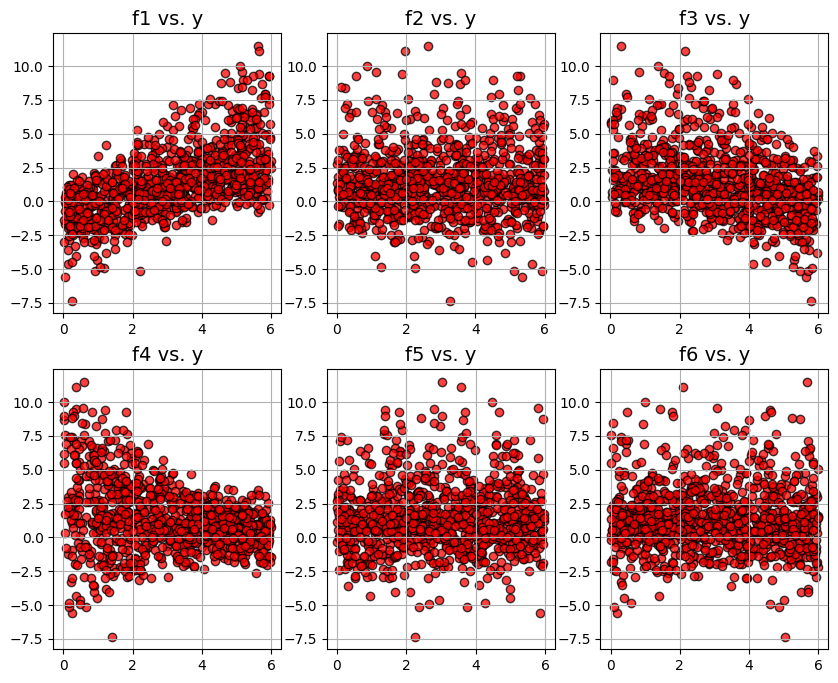

In [14]:
fig,ax = plt.subplots(2,3,figsize=(10,8))
ax = ax.ravel()
for i in range(6):
   ax[i].scatter(df_synthetic[df_synthetic.columns[i]],df_synthetic['y'],edgecolor='k',color='red',alpha=0.75)
   ax[i].set_title(f"{df_synthetic.columns[i]} vs. y",fontsize=14)
   ax[i].grid(True)
plt.show()

In [15]:
# Add code below

# Perform test train split of the dataframe 'df_synthetic'

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_synthetic, test_size=0.2)

In [33]:
ytrain = pd.DataFrame(data = train["y"], 
                  columns = ["y"])


In [38]:
xtrain = train.drop(columns=["y"])
xtrain.head()
xtrain.shape

(800, 6)

In [39]:
ytest = pd.DataFrame(data = test["y"], 
                  columns = ["y"])
xtest = test.drop(columns=["y"])


In [71]:
xtrain_arr = xtrain.to_numpy()
ytrain_arr = ytrain.to_numpy().ravel()
xtest_arr = xtest.to_numpy()
ytest_arr = ytest.to_numpy().ravel()

In [72]:
ytest_arr.shape

(200,)

In [ ]:
Support vector regressor with linear kernel

In [73]:
# Add code below
# Create linear support vector regressor model and fit it on the dataset
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
svm = SVR(kernel='linear')
svm.fit(xtrain_arr, ytrain_arr)
pred = svm.predict(xtest_arr) 


In [75]:
# Add code below
# Display the R2 score
from sklearn.metrics import r2_score
r2score = r2_score(ytest_arr, pred)
print(r2score)


0.6488464744568104


In [78]:
# Add code below

# Build a linear regressor on the above dataset and report its R2 score
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xtrain_arr, ytrain_arr)
y_pred = reg.predict(xtest_arr)
regscore = r2_score(ytest_arr, y_pred)
print(regscore)

0.6516891571179328


Support vector regressor with RBF kernel

In [80]:
#Add code below

# Use RBF kernel with default values and perform support vector regression
svm = SVR(kernel='rbf')
svm.fit(xtrain_arr, ytrain_arr)
pred = svm.predict(xtest_arr) 


In [81]:
# Add code below
# Report R2 score of the above model
r2score = r2_score(ytest_arr, pred)
print(r2score)


0.805463296583104


In [83]:
# Add code below

# Perform grid search of hyperparameters - cost C and epsilon, keep gamma at 'scale' (with cross-validation) to see if the test/validation score be improved
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(SVR(),  {'C': [1.0, 1.5, 2], 'epsilon': [0.1, 0.2],'gamma': ['scale'], 'kernel': ['rbf','linear']}, cv = 5, scoring = 'r2', verbose =1, n_jobs = -1)
grid_result = grid_search_cv.fit(xtrain_arr, ytrain_arr)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [85]:
# Add code below

# Check best model by the grid search and display it
display(grid_search_cv.best_score_)
display(grid_search_cv.best_params_)


0.7845569480522958

{'C': 2, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}

In [87]:
# Add code below

# Fit that model to the data and check the R2 score
model_svr_best = SVR(kernel='rbf',C=2.5, epsilon= 0.3, gamma = 'scale')
model_svr_best.fit(xtrain_arr, ytrain_arr)
y_pred_svr_best= model_svr_best.predict(xtest_arr)
r2_score(ytest_arr, y_pred_svr_best)

0.8127631285335031